# Human Resource Analysis

## Problem Statement

AB Consultants is a company that outsources its employees as Consultants to top various IT firms. They have been in the Industry for a long time. Their business had been increasing quite well over past, however in recent times there has been a slowdown in terms of growth because their best and most experienced employees have started leaving the Company.

## Objective

Perform the required analysis and find out patterns as to why the best employees are leaving so early.

## 1.0 Visualization and Distribution of Data




In [45]:
import numpy as np
import scipy
import pandas
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
#Importing data
df = pandas.DataFrame.from_csv("C:\\Users\\M1030543\\Desktop\\340_cert_project_v2.0\\HR_Data.csv",index_col=None)

df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

## 1.1 Exploring Imported Data

In [17]:
# Displaying the statical overview of the employee
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [65]:
#Overview of summary (Employees Left VS Working(Not Left))
left = df.groupby("left")
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 1.2 Correction Matrix and Heatmap

From the Heatmap and correlation matrix, we can analyse that there is strong correlation between employee satisfaction level and attrition rate.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


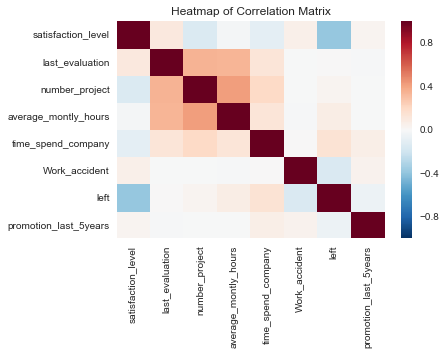

In [46]:
corr = df.corr()

sns.heatmap(corr,
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
sns.plt.title("Heatmap of Correlation Matrix")

corr

## 1.3 Distribution Plots

Following are the various distribution plots to explore and analyze the data.

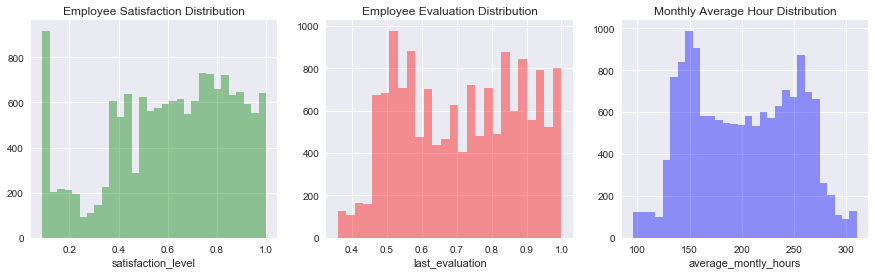

In [254]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')

# Graph Employee Evaluation Distribution
sns.distplot(df.last_evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')

# Graph Empployee Average Hour Distribution
sns.distplot(df.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title("Monthly Average Hour Distribution")

## 1.4 Salary Vs Employee Left

From the graph, it is clearly visible that there is no direct relationship between the salary of the employee and his decision to leave. So, this data is not very useful in analysis.

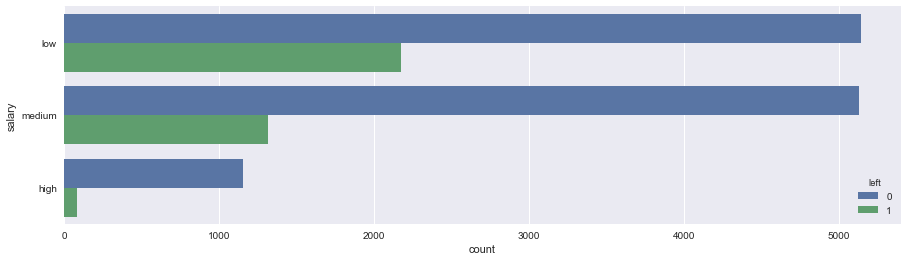

In [112]:
f, ax = plt.subplots(figsize=(15,4))

sns.countplot(y="salary", hue="left", data=df)

## 1.5 Number of Project VS Attrition

Based on the distribution, it can be analysed that most employees left the organisation either because they are under utilized or over utilized. Maximum attrition rate is among the employee working on either 2 projects or equal to and more than 6 projects.

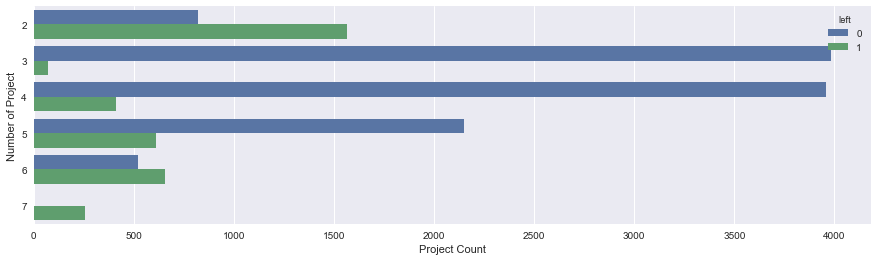

In [134]:
f, ax = plt.subplots(figsize=(15,4))

ax = sns.countplot(y="number_project", hue="left", data=df)
ax.set(xlabel="Project Count")
ax.set(ylabel="Number of Project")

## 1.6 Average Monthly Hour spend VS Attrition

We cannot analyze much information from the below distribution graph but it seems that employee working for around 200hrs/week are not very happy with the organization.

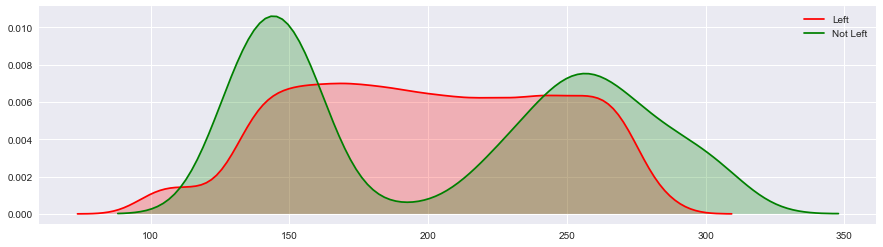

In [138]:
f, axes = plt.subplots(figsize=(15,4))

sns.kdeplot(df.loc[(df['left']==0), 'average_montly_hours'], color='r', shade=True, label="Left")
sns.kdeplot(df.loc[(df['left']==1), 'average_montly_hours'], shade=True, color='g', label="Not Left")

## 1.7 Employee Evaluation VS Attrition
Employee having evaluation score around 0.5 are unhappy with the organization.

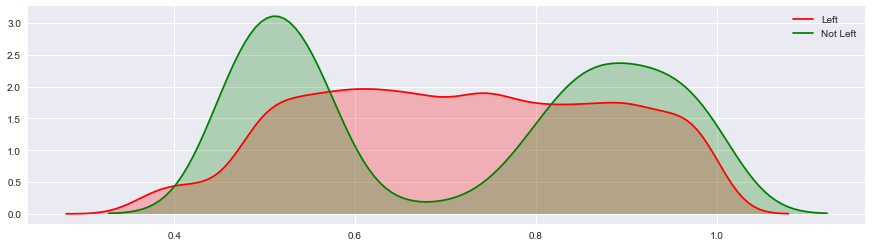

In [139]:
f, ax = plt.subplots(figsize = (15,4))

sns.kdeplot(df.loc[(df['left']==0), 'last_evaluation'], shade=True, label="Left", color='r')
sns.kdeplot(df.loc[(df['left'] ==1), 'last_evaluation'], shade=True, label="Not Left", color='g')

## 1.8 Project Count VS Average Monthly Hours

From the below description, we can conclude that employee working for more than 250 hours and more that 6 project or less that 150 hours and less that or equal to 2 projects are leaving the company either because of being over utilized or under utilized.

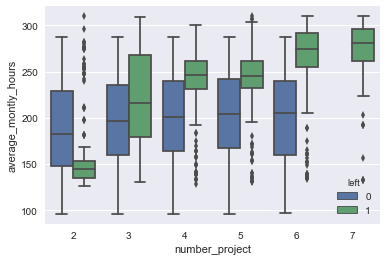

In [140]:
sns.boxplot(x='number_project', y='average_montly_hours', hue='left', data=df)

## 1.9 Project Count VS Employee Evaluation

From the below distribution, we can analyze following : 
1. Employee working on 2 projects and having evalution score less than 0.5 have more chance of leaving the company.
2. Employee working on 5 or more projects and having evalution score greater than 0.8 have more chance of leaving the company.

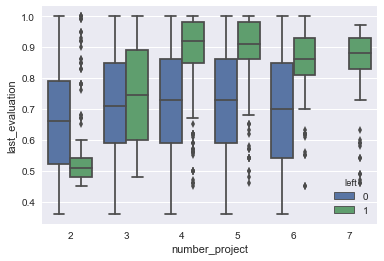

In [141]:
sns.boxplot(x='number_project', y='last_evaluation', hue='left', data=df)

## 2.0 Comparing different Machine Learning models

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [187]:
y = df['left']
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

## 2.1 Using Logistic Regression Model
Logistic Regression model has accuracy of 76.7% to correctly predict the employees leaving the organization.

In [216]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25)
lReg = LogisticRegression()
lReg.fit(Xtrain,Ytrain)
accuracy_score(Ytest,lReg.predict(Xtest))

0.76719999999999999

## 2.2 Naive Bayes Classification model
Naive Bayes classification model has accuracy of 80.3% to correctly predict the employees leaving the organization.

In [192]:
nb_clf = GaussianNB()
nb_clf.fit(Xtrain,Ytrain)
accuracy_score(Ytest,nb_clf.predict(Xtest))

0.8037333333333333

## 2.3 Support Vector Machine Model
This model has accuracy of 95.2% to correctly predict the employees leaving the organization.

In [196]:
svm_clf = svm.SVC()
svm_clf.fit(Xtrain,Ytrain)
accuracy_score(Ytest,svm_clf.predict_(Xtest))

0.95173333333333332

## 2.4 Decision Tree Classification
This model has accuracy of 97.8% to correctly predict the employees leaving the organization.

In [225]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(Xtrain,Ytrain)
dt_predict = dt_clf.predict(Xtest)
accuracy_score(Ytest,dt_predict)

0.97840000000000005

## 2.5 Random Forest Classification

This model has accuracy of 98.6% to correctly predict the employees leaving the organization.

In [221]:
rf_clf = RandomForestClassifier()
rf_clf.fit(Xtrain,Ytrain)
accuracy_score(Ytest,rf_clf.predict(Xtest))

0.98586666666666667

# 3.0 Final Prediction Model

Random Forest classification model has the highest accuracy of 98.6% as compared to other models. Therefore, we are selecting Random Forest model to predict the employees who are most likely to leave the company.

In [253]:
stay = df[df['left']==0]
stay = real_data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
count = 0
pred = rf_clf.predict(real_data)
stay[pred == 1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
2095,0.54,0.67,4,282,6,0,0
3780,0.86,0.96,5,238,5,0,0
4192,0.37,0.48,2,285,5,0,0
5994,0.80,0.99,4,255,5,1,0
6263,0.90,0.87,4,231,5,0,0
7077,0.90,0.85,4,279,6,0,0
7857,0.36,0.63,2,278,4,0,0
7989,0.36,0.45,2,135,3,1,0
8522,0.31,0.53,2,146,3,1,0
